# Import libraries

In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
#Read the data from csv file

df_house = pd.read_csv('Maison.csv')
df_house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [4]:
df_house = df_house.rename(index = str,
                    columns = {'PRIX':'Price', 'SUPERFICIE':'Area', 'CHAMBRES':'Rooms', 'SDB':'Bathroom', 'ETAGES':'Floors',
                               'ALLEE':'Driveway', 'SALLEJEU':'Game_room', 'CAVE':'Cellar', 'GAZ':'Gas', 'AIR':'Air',
                               'GARAGES':'Garage', 'SITUATION':'Situation'})

In [5]:
df_house.head()

,Price,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [6]:
#Shape of dataset

df_house.shape

(546, 12)

In [7]:
# Getting basic information of dataset

df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      546 non-null    int64
 1   Area       546 non-null    int64
 2   Rooms      546 non-null    int64
 3   Bathroom   546 non-null    int64
 4   Floors     546 non-null    int64
 5   Driveway   546 non-null    int64
 6   Game_room  546 non-null    int64
 7   Cellar     546 non-null    int64
 8   Gas        546 non-null    int64
 9   Air        546 non-null    int64
 10  Garage     546 non-null    int64
 11  Situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [8]:
# Getting Five number summery of Numerical columns

df_house.describe()

,Price,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [9]:
# Checking for null values

df_house.isnull().sum()   #There is no null values in the dataset

Price        0
Area         0
Rooms        0
Bathroom     0
Floors       0
Driveway     0
Game_room    0
Cellar       0
Gas          0
Air          0
Garage       0
Situation    0
dtype: int64

In [10]:
# Checking unique values in each column

df_house.nunique().sort_values(ascending=False)

Area         284
Price        219
Rooms          6
Bathroom       4
Floors         4
Garage         4
Driveway       2
Game_room      2
Cellar         2
Gas            2
Air            2
Situation      2
dtype: int64

In [11]:
house = df_house

# Correlation Check

<AxesSubplot:>

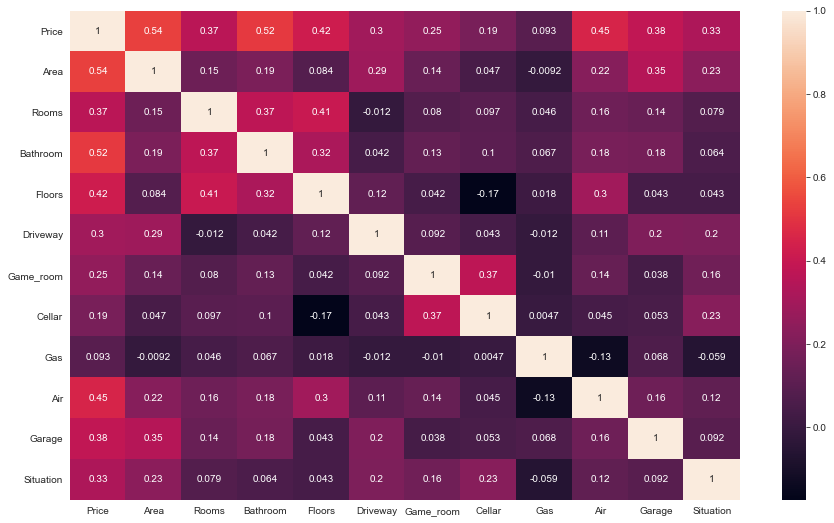

In [12]:
# Checking correlation between numerical variables

correlations = house.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(correlations, annot=True)

In [13]:
def correlation(dataset, threshold):
    col_corr = list() # list of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr

In [14]:
corr_feature = correlation(house, 0.75)
len(set(corr_feature))

0

In [15]:
corr_feature  #There is no correlated variables in dataset

[]

# Cheking for the Zero Variance

In [16]:
selector = VarianceThreshold(threshold=0)
selector.fit(house)

VarianceThreshold(threshold=0)

In [17]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
house.columns[selector.get_support()]

Index(['Price', 'Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room',
       'Cellar', 'Gas', 'Air', 'Garage', 'Situation'],
      dtype='object')

In [19]:
# Get features which have the variance less than the set threshold values using list comprehension

selected_cols = [column for column in house.columns if column not in house.columns[selector.get_support()]]

In [20]:
selected_cols   #There is no zero variance columns 

[]

In [21]:
house.columns

Index(['Price', 'Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room',
       'Cellar', 'Gas', 'Air', 'Garage', 'Situation'],
      dtype='object')

# Distribution of attributes

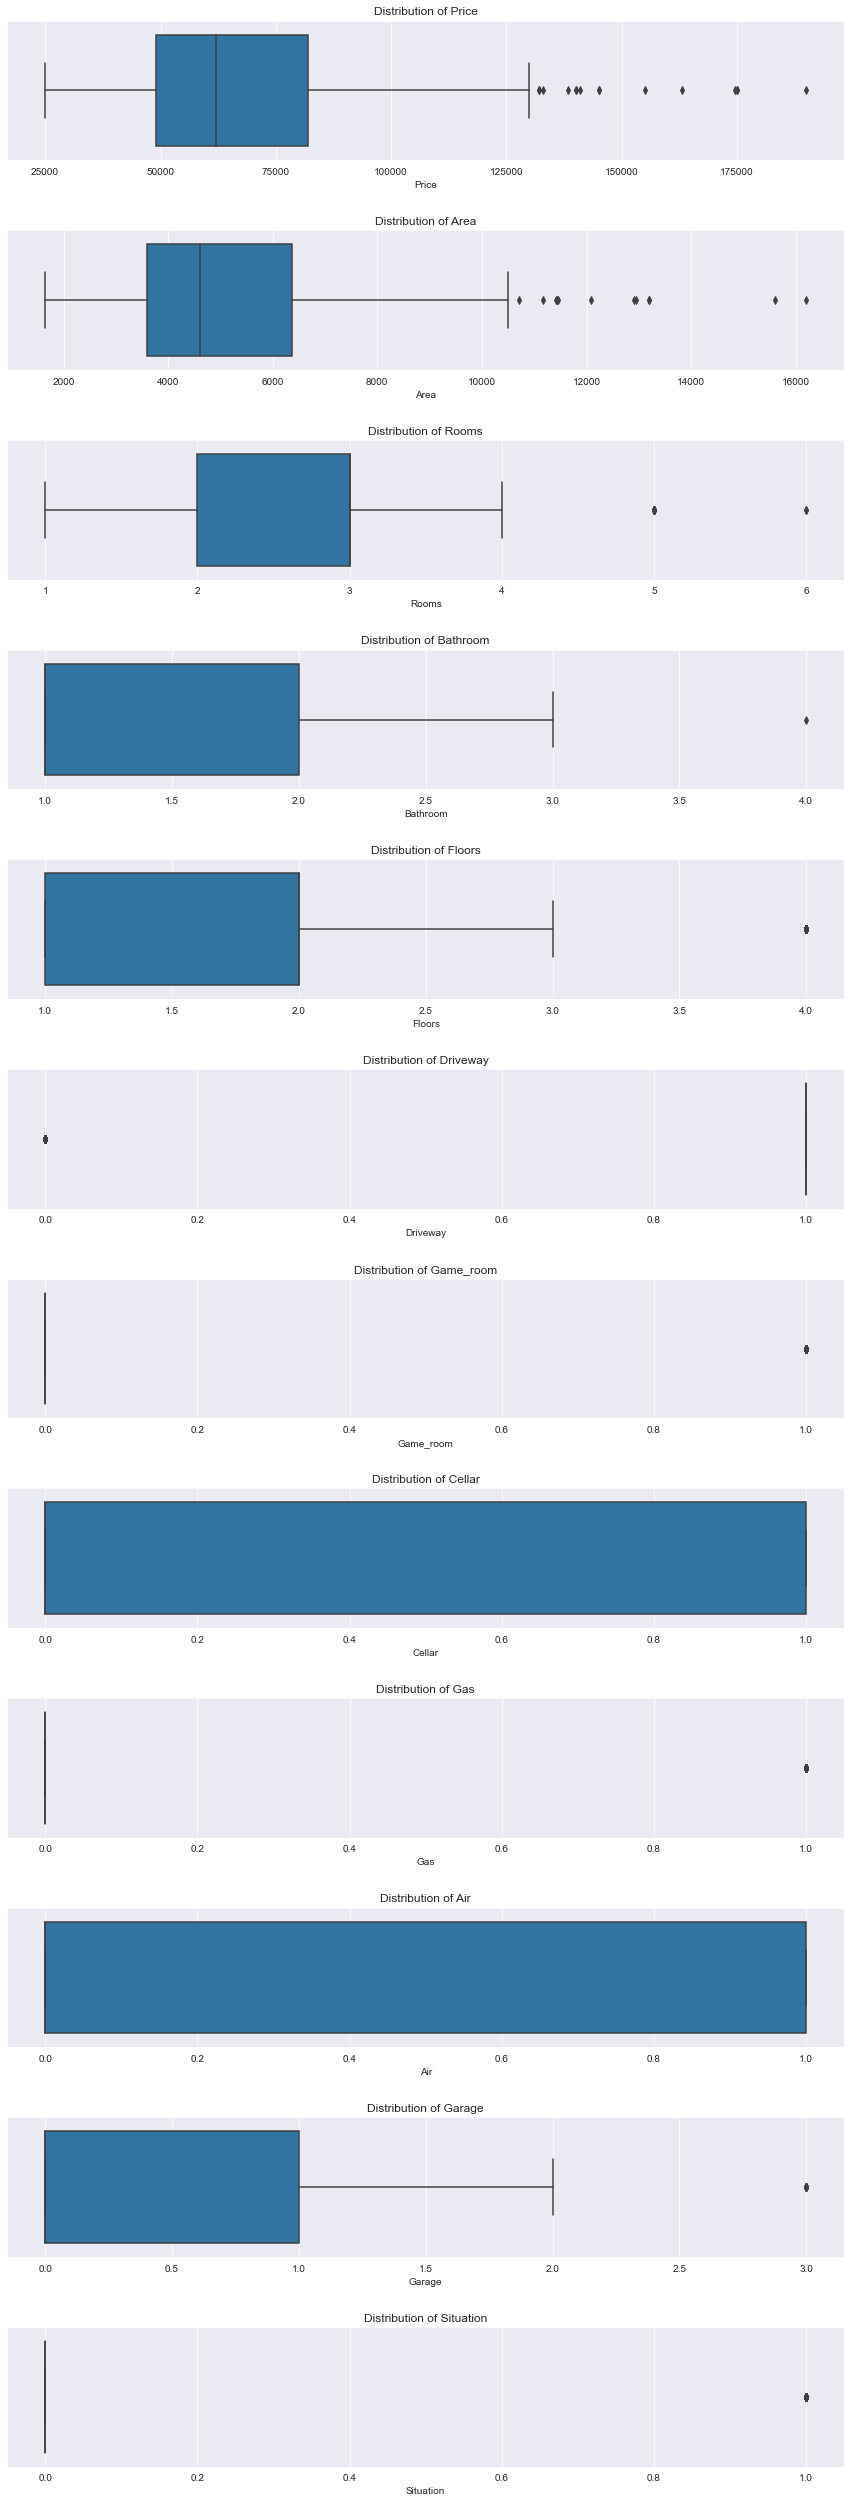

In [22]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(house):
    sns.boxplot(x=house[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

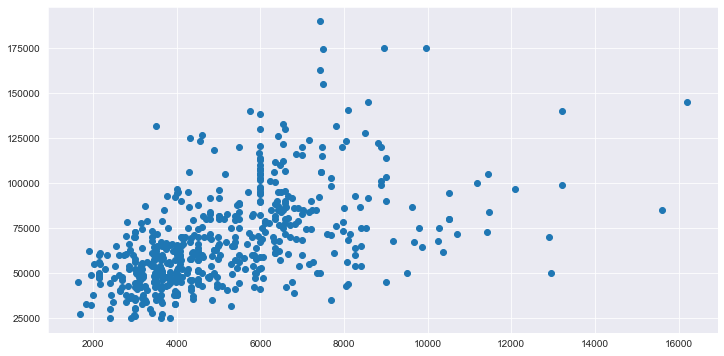

In [23]:
# Let's see we have a linear relation between price and area

plt.scatter(house['Area'], house['Price'])
plt.show()

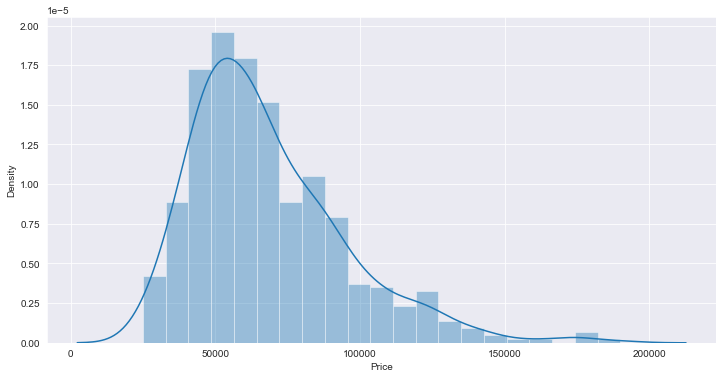

In [24]:
sns.distplot(house['Price'])
plt.show()

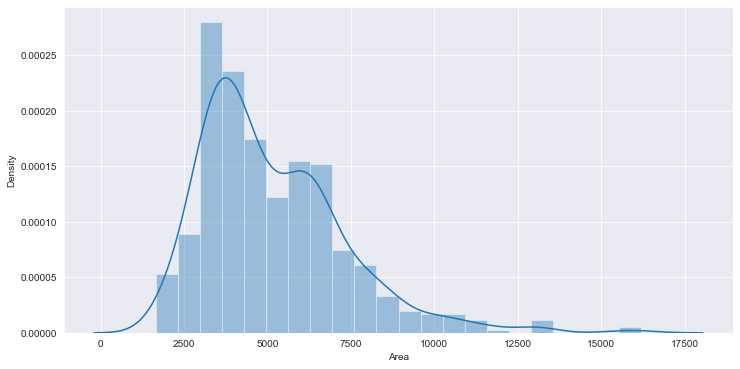

In [25]:
sns.distplot(house['Area'])
plt.show()

# Handling Outliers by Removing

In [26]:
# define a function called 'detect_outliers_iqr' which returns a list of index of outliers
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def detect_outliers_iqr(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]

    return ls

In [27]:
#create an empty list to store the output from multiple columns

outliers_list = []

for out_list in ['Area']:
    outliers_list.extend(detect_outliers_iqr(house, out_list)) 

In [28]:
print("Outliers from IQR method: ", len(outliers_list)) 

Outliers from IQR method:  12


In [29]:
#define a function called 'remove' which returns a cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [30]:
encoded_df = remove(house, outliers_list)

In [31]:
encoded_df.shape

(534, 12)

<AxesSubplot:xlabel='Area'>

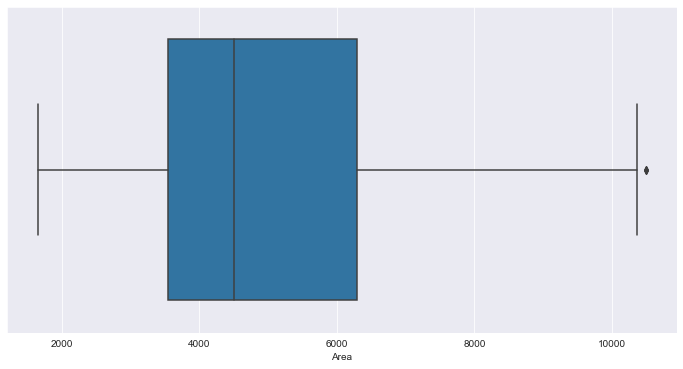

In [32]:
sns.boxplot(x=encoded_df['Area'])

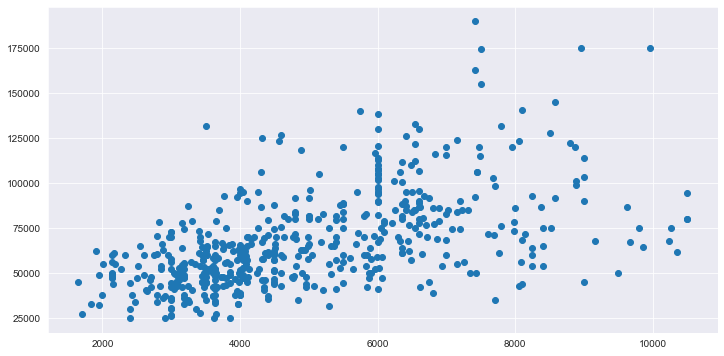

In [33]:
# Let's see we have a linear relation between price and area

plt.scatter(encoded_df['Area'], encoded_df['Price'])
plt.show()

# Split the data into X and Y

In [34]:
x = encoded_df.drop(['Price'], axis = 1).values
y = encoded_df['Price'].values

# Standardization & Scaling of Features

In [35]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

In [36]:
#Split the data into Train-Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Build the Linear Regression Model

In [37]:
#we now instatiate a Linear Regression object

lm = LinearRegression()

In [38]:
# Now let's build the model using sklearn

lm.fit(x_train, y_train)

LinearRegression()

# Prediction

In [39]:
predictions = lm.predict(x_test)

<AxesSubplot:>

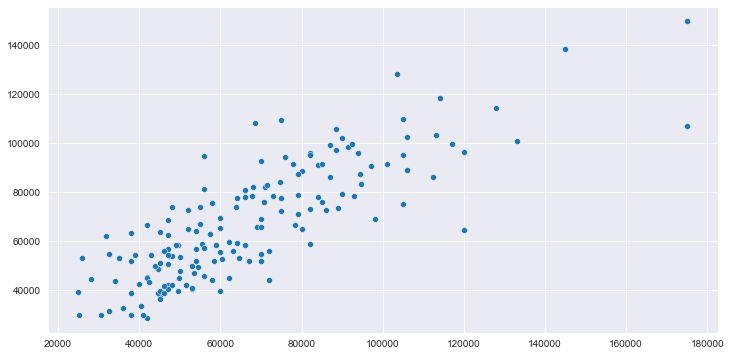

In [40]:
sns.scatterplot(y_test, predictions)

In [41]:
print("Accuracy --> ", lm.score(x_test, y_test)*100)

Accuracy -->  66.4312356303573


In [42]:
x_endog = sm.add_constant(x_test)

In [43]:
res = sm.OLS(y_test, x_endog)
res.fit()

In [44]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     33.91
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.68e-35
Time:                        18:51:44   Log-Likelihood:                -1768.7
No. Observations:                 161   AIC:                             3561.
Df Residuals:                     149   BIC:                             3598.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.701e+04   1194.112     56.113      0.000    6.46e+04    6.94e+04
x1          1.018e+04   1537.129      6.620      0.000    7138.373    1.32e+04
x2          -777.6540   1455.728     -0.534      0.594   -3654.192    2098.884
x3          8088.1153   1275.127      6.343      0.000    5568.447    1.06e+04
x4          6606.7427   1515.677      4.359      0.000    3611.745    9601.740
x5          1302.4487   1227.642      1.061      0.290   -1123.387    3728.285
x6          -751.3278   1327.559     -0.566      0.572   -3374.602    1871.947
x7          1471.9522   1277.529      1.152      0.251   -1052.462    3996.367
x8          1695.5898   1312.674      1.292      0.198    -898.271    4289.451
x9          3498.7574   1371.165      2.552      0.012     789.318    6208.197
x10         1537.3620   1332.999      1.153      0.251   -1096.661    4171.385
x11         4496.8398   1348.000      3.336      0.001    1833.174    7160.506
==============================================================================
Omnibus:                       17.042   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.614
Skew:                           0.568   Prob(JB):                     1.66e-06
Kurtosis:                       4.636   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
x_endog_test = sm.add_constant(x_test)
model = res.fit()
predictions = model.predict(x_endog_test)
# predictions

# Store The Result in csv file

In [46]:
y = pd.DataFrame(x_test)
y['y_test'] = y_test
y['Predictions'] = predictions
y = y.reset_index(drop=True)
y.head()

,0,1,2,3,4,5,6,7,8,9,10,y_test,Predictions
0,-0.421625,0.053533,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,0.368668,-0.544166,70100,54637.195614
1,-0.610632,0.053533,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,-0.796236,-0.544166,44500,50923.031624
2,-0.205618,1.414799,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,-0.796236,-0.544166,50000,53985.763338
3,-0.545829,0.053533,-0.573759,0.216942,0.410476,-0.468165,1.367833,-0.21693,-0.683398,-0.796236,-0.544166,32500,54671.948597
4,-0.648433,-1.307733,-0.573759,0.216942,0.410476,2.136001,1.367833,-0.21693,-0.683398,-0.796236,-0.544166,55500,52729.891644


In [47]:
y.columns=[['Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room', 'Cellar', 'Gas', 'Air', 'Garage', 'Situation','Price','Predictions']]
y.head()

,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation,Price,Predictions
0,-0.421625,0.053533,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,0.368668,-0.544166,70100,54637.195614
1,-0.610632,0.053533,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,-0.796236,-0.544166,44500,50923.031624
2,-0.205618,1.414799,-0.573759,0.216942,0.410476,-0.468165,-0.731083,-0.21693,-0.683398,-0.796236,-0.544166,50000,53985.763338
3,-0.545829,0.053533,-0.573759,0.216942,0.410476,-0.468165,1.367833,-0.21693,-0.683398,-0.796236,-0.544166,32500,54671.948597
4,-0.648433,-1.307733,-0.573759,0.216942,0.410476,2.136001,1.367833,-0.21693,-0.683398,-0.796236,-0.544166,55500,52729.891644


In [48]:
y.to_csv('Regression_prediction.csv')